# Probability that two people in a room of k people have the birthday on same date

We need to check the probability that out of k people at least 2 people were born on the same date during the year. The solution by simulation should converge towards the theoretical solution as the number of iterations increases.

In [2]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

def birthday_probability(num_people):
    P = 1-(math.factorial(365)/(math.factorial(365-num_people)*365**num_people))
#     print (round((P*100),2),'%')
    return P*100

In [3]:
# for 23 people
birthday_probability(23)

50.72972343239854

In [4]:
birthday_probability(20)

41.14383835805799

In [4]:
n=2 # verovatnoca za dvoje ljudi u %
birthday_probability(2)

0.2739726027397249

In [5]:
# verovatnoca za dvoje ljudi u %
birthday_probability(3)

0.8204165884781345

In [16]:
for i in range(23,50,1):
    print(i, birthday_probability(i))

23 50.72972343239854
24 53.83442579145288
25 56.86997039694639
26 59.8240820135939
27 62.685928226324194
28 65.44614723423993
29 68.0968537477777
30 70.63162427192687
31 73.04546337286439
32 75.33475278503207
33 77.4971854175772
34 79.53168646201543
35 81.43832388747153
36 83.21821063798795
37 84.87340082163846
38 86.40678210821208
39 87.8219664366722
40 89.1231809817949
41 90.31516114817354
42 91.40304715618693
43 92.39228556561199
44 93.28853685514264
45 94.0975899465775
46 94.82528433672547
47 95.47744028332994
48 96.05979728794225
49 96.57796093226764


### Simulation

In [9]:
days=np.arange(1,366,1).tolist() # generisemo listu od 365 dana iz koje cemo vrsiti slucajne izbore

In [10]:
random.seed(123)

def simulation_of_birthday_problem(num_people, num_iteration):
    
    count_same_day = 0
    for i in range(num_iteration):
        birthdays = [0]*num_people
        for person in range(0,num_people):
            birthdays[person] = random.choice(days) # u listu appendujemo nasumicno generisani rodjendan za svakog persona
        if len(set(birthdays)) < len(birthdays):  # proveravamo da li su izvucena barem dva ista rodjendana (tj. isti dani)
            count_same_day+=1
#     print(f'% rodjendana istog datuma, za {num_people} persona :', (count_same_day/num_iteration)*100, '%')
    return (count_same_day/num_iteration)*100

In [11]:
#verovatnoca za dvoje ljudi za 100000 iteracija, trebalo bi da tezi teorijskoj verovatnoci
simulation_of_birthday_problem(2, 10000)

0.31

In [12]:
simulation_of_birthday_problem(3, 10000)

0.8999999999999999

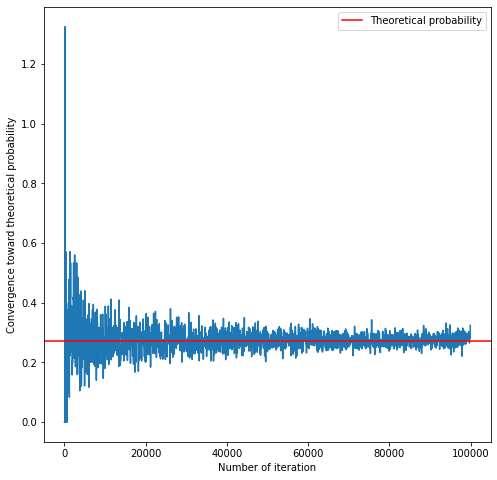

In [13]:
probabilities = []
iterations = np.arange(1,100000,50).tolist()
for iter_ in iterations:
    result = simulation_of_birthday_problem(2,iter_)
    probabilities.append(result)


plt.figure(figsize=(8,8))
plt.plot(iterations, probabilities)
plt.axhline(0.27, label='Theoretical probability', color='red')
plt.xlabel('Number of iteration')
plt.ylabel('Convergence toward theoretical probability')
plt.legend();

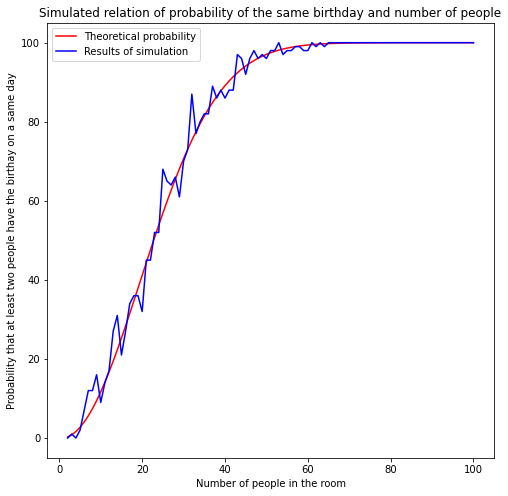

In [18]:
probabilities_simulation = []
num_people = np.arange(2,101,1).tolist()
for person in num_people:
    result = simulation_of_birthday_problem(person,100)
    probabilities_simulation.append(result)

probabilities_theoretical = []
num_people = np.arange(2,101,1).tolist()
for person in num_people:
    result_ = birthday_probability(person)
    probabilities_theoretical.append(result_)


plt.figure(figsize=(8,8))
plt.plot(num_people, probabilities_theoretical, color='red', label='Theoretical probability')
plt.plot(num_people, probabilities_simulation, color='blue', label='Results of simulation')
plt.xlabel('Number of people in the room')
plt.ylabel('Probability that at least two people have the birthay on a same day')
plt.title('Simulated relation of probability of the same birthday and number of people')
plt.legend();